## Importing required modules.
### Numpy modules module required to perform basic matrix operations.

In [13]:
import numpy as np
import matplotlib.pyplot as plt # For visualization purpose

### Bezier extraction operator.

In [21]:
def bezier_extraction(knot,p):
    """
    Input: 
        Knot --> Knot vector
        p    --> Degree
    
    Output:
        C  --> 3 dimentional Extraction matrix (numpy array). 
               Each p+1,p+1 matrix is the local extraction operator.
        ne --> number of local extraction matrices.
        
    Test:
        knot = [0,0,0,0.5,1,1,1]
        p = 2
        [C, ne] = bezierExtraction(knot,p)
    """


    m  = len(knot)-p-1
    a  = p+1
    b  = a+1
    ne = 0
    C = []
    C.append(np.eye(p+1,p+1))
    alphas = {}
    #numerator = []
    
    while b <= m:
        C.append(np.eye(p+1,p+1))
        i=b
        while b <= m and knot[b] == knot[b-1]:
            b=b+1
            
        multiplicity = b-i+1
        if multiplicity < p:
            numerator = (knot[b-1]-knot[a-1])
            for j in range(p,multiplicity,-1):
                alphas[j-multiplicity]=numerator/(knot[a+j-1]-knot[a-1])

            r=p-multiplicity
            for j in range(1,r+1):
                save = r-j+1
                s = multiplicity + j
                for k in range(p+1,s,-1):
                    alpha=alphas[k-s]
                    C[ne][:,k-1]= alpha*C[ne][:,k-1] + (1-alpha)*C[ne][:,k-2]
                if b <= m:
                    C[ne+1][save-1:save+j, save-1] = C[ne][p-j:p+1, p]
            ne=ne+1
            if b <= m:
                a=b
                b=b+1

        elif multiplicity == p:
            if b <= m:
                ne=ne+1
                a=b
                b=b+1
    return C, ne+1


In [3]:
knot = [0,0,0,0,0.5,1,1,1,1]
p=3
[C, ne] = bezier_extraction(knot,p)

## Number of extraction matrices
### ne = 2

In [4]:
ne

2

## First local extraction operator
$\textrm{C}[0] = \begin{bmatrix} 1.0 & 0.0 & 0.0 \\ 0.0 & 1.0 & 0.5 \\ 0.0 & 0.0 & 0.5 \\\end{bmatrix}$

In [5]:
C[0]

array([[1.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.5 , 0.25],
       [0.  , 0.  , 0.5 , 0.5 ],
       [0.  , 0.  , 0.  , 0.25]])

# Second Extraction operator
$\textrm{C}[1] = \begin{bmatrix} 0.5 & 0.0 & 0.0 \\ 0.5 & 1.0 & 0.0 \\ 0.0 & 0.0 & 1.0 \end{bmatrix}$

In [6]:
C[1]

array([[0.25, 0.  , 0.  , 0.  ],
       [0.5 , 0.5 , 0.  , 0.  ],
       [0.25, 0.5 , 1.  , 0.  ],
       [0.  , 0.  , 0.  , 1.  ]])

In [4]:
def bezier(i,n, xi):
    """
    This function returns the value of i^{th} Bezier basis function of degree n, 
    at parametric value xi.
    
    Inputs:
        i : Basis function index.
        n : Degree of the curve.
        xi : Parametric value.
        
    Output:
        nth degree, i^{th} Bezier basis function value at xi. 
    
    """
    if i==1 and n==0:
        return 1
    elif n==0 and i!=1:
        return 0
    else:
        if i<1 or i>n+2:
            return 0
        else:
            return xi*bezier(i-1,n-1, xi) + (1-xi)*bezier(i,n-1, xi)

In [48]:
def bezierbasis(n,xi):
    """
    Returns all the Bezier basis functions of degree n
    in the parametric range 0 to 1.
    Input:
        n : Degree of Bezier curve.
    Output:
        List of all the basis functions.
    """
    
    if n<0:
        b = 0
    else:
        b = []
        for i in range(1,n+2):
            b.append(bezier(i,n,xi))
    return b

In [63]:
b = bezierbasis(2,1)
b = np.array(b)
B[0][1,:]

array([0. , 1. , 0.5])

# Converting Bezier basis functions into B-spline basis functions using Extraction operator.

In [36]:

B, nel = bezier_extraction(Kvector,p)
B

[array([[1. , 0. , 0. ],
        [0. , 1. , 0.5],
        [0. , 0. , 0.5]]),
 array([[0.5       , 0.        , 0.        ],
        [0.5       , 1.        , 0.50746269],
        [0.        , 0.        , 0.49253731]]),
 array([[0.50746269, 0.        , 0.        ],
        [0.49253731, 1.        , 0.        ],
        [0.        , 0.        , 1.        ]])]

In [39]:
B[0]

array([[1. , 0. , 0. ],
       [0. , 1. , 0.5],
       [0. , 0. , 0.5]])

In [69]:
def bezier_bspline(p, Kvector):
    B, nel = bezier_extraction(Kvector,p)
    B_spline = []
    for i in range(0,nel):
        b_tt = []
        for j in range(0, p+1):
            b_t = []
            for xi in range(0,100):
                b = bezierbasis(p,xi/100);
                b = np.array(b);
                b_t.append(np.dot(b,B[i][j,:]))
            b_tt.append(b_t)
        B_spline.append(b_tt)
    return B_spline


In [70]:
p = 2
Kvector = [0,0,0,0.33,0.66,1,1,1]
N = bezier_bspline(p, Kvector)
# N is list of element basis functions
# N[0] is basis function values
# N[0][0] First basis function of first element

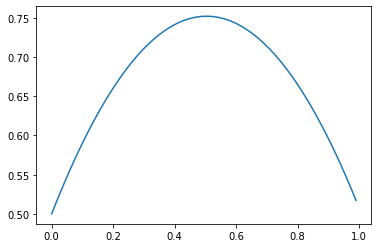

In [79]:
plt.plot(x,N[1][1])